#### Import Libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

#### CNN Model 1

In [2]:
class CNN1(nn.Module):
    def __init__(self):
        super(CNN1, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)  #Input channels for CIFAR-10= 3 
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)  
        self.fc2 = nn.Linear(128, 10)  #10 output classes for CIFAR-10

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)  #Flatten before fully connected layers
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

#### CNN Model 2

In [3]:
class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

#### CNN Model 3

In [4]:
class CNN3(nn.Module):
    def __init__(self):
        super(CNN3, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 64 * 4 * 4)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

#### Load CIFAR-10 Dataset

In [5]:
# Download and load CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


#### Model Training Function

In [6]:
# Define function for model training
def train_model(model, trainloader, criterion, optimizer, epochs=10):
    loss_list = []
    accuracy_list = []
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Calculate loss and accuracy
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        loss_list.append(running_loss / len(trainloader))
        accuracy_list.append(100 * correct / total)
        print(f'Epoch {epoch+1}, Loss: {running_loss / len(trainloader):.4f}, Accuracy: {100 * correct / total:.2f}%')
    return loss_list, accuracy_list

#### Parameter Count

In [7]:
# Function to calculate total number of model parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Initialize models
model1 = CNN1()
model2 = CNN2()
model3 = CNN3()

# Print number of parameters for each model
print(f"CNN1 has {count_parameters(model1)} parameters.")
print(f"CNN2 has {count_parameters(model2)} parameters.")
print(f"CNN3 has {count_parameters(model3)} parameters.")

CNN1 has 268650 parameters.
CNN2 has 1070794 parameters.
CNN3 has 288554 parameters.


#### Model Training

In [8]:
# Initialize optizers and loss function 
optimizer1 = optim.Adam(model1.parameters(), lr=0.001)
optimizer2 = optim.Adam(model2.parameters(), lr=0.001)
optimizer3 = optim.Adam(model3.parameters(), lr=0.001)

criterion = nn.CrossEntropyLoss()

# Train all models
print('\nTraining CNN1.....')
loss1, acc1 = train_model(model1, trainloader, criterion, optimizer1, epochs=25)
print('\nTraining CNN2.....')
loss2, acc2 = train_model(model2, trainloader, criterion, optimizer2, epochs=25)
print('\nTraining CNN3.....')
loss3, acc3 = train_model(model3, trainloader, criterion, optimizer3, epochs=25)


Training CNN1.....
Epoch 1, Loss: 1.4513, Accuracy: 47.86%
Epoch 2, Loss: 1.0984, Accuracy: 61.24%
Epoch 3, Loss: 0.9451, Accuracy: 66.73%
Epoch 4, Loss: 0.8443, Accuracy: 70.24%
Epoch 5, Loss: 0.7651, Accuracy: 73.37%
Epoch 6, Loss: 0.6960, Accuracy: 75.79%
Epoch 7, Loss: 0.6328, Accuracy: 77.80%
Epoch 8, Loss: 0.5766, Accuracy: 79.92%
Epoch 9, Loss: 0.5215, Accuracy: 81.78%
Epoch 10, Loss: 0.4706, Accuracy: 83.47%
Epoch 11, Loss: 0.4206, Accuracy: 85.44%
Epoch 12, Loss: 0.3761, Accuracy: 86.96%
Epoch 13, Loss: 0.3346, Accuracy: 88.29%
Epoch 14, Loss: 0.2907, Accuracy: 89.92%
Epoch 15, Loss: 0.2568, Accuracy: 91.01%
Epoch 16, Loss: 0.2245, Accuracy: 92.29%
Epoch 17, Loss: 0.1961, Accuracy: 93.16%
Epoch 18, Loss: 0.1731, Accuracy: 94.02%
Epoch 19, Loss: 0.1533, Accuracy: 94.65%
Epoch 20, Loss: 0.1381, Accuracy: 95.22%
Epoch 21, Loss: 0.1221, Accuracy: 95.74%
Epoch 22, Loss: 0.1081, Accuracy: 96.29%
Epoch 23, Loss: 0.1012, Accuracy: 96.47%
Epoch 24, Loss: 0.0956, Accuracy: 96.79%
Epoch

#### Plot Generation

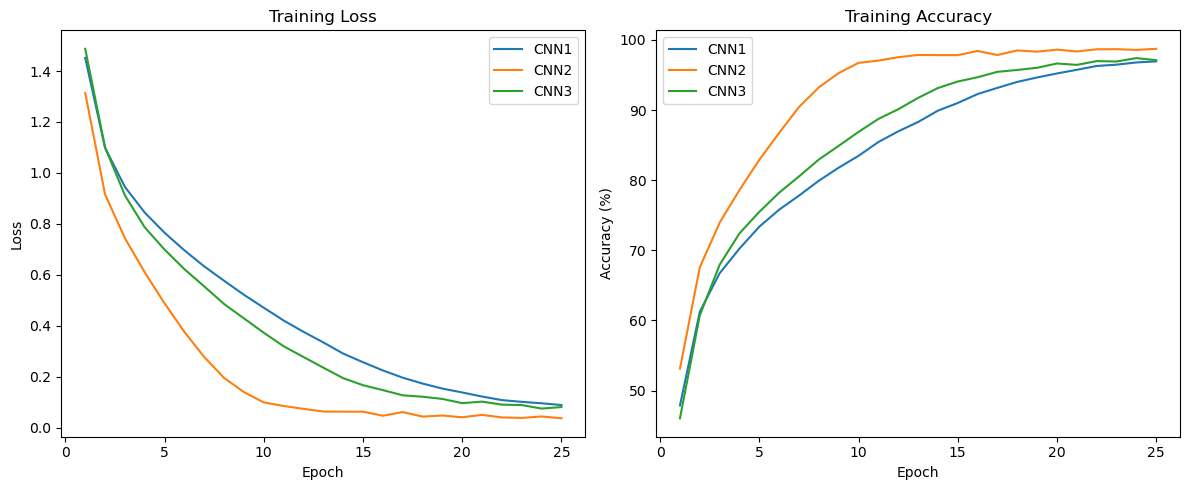

In [9]:
# Plot loss and accuracy for all models
epochs = range(1, 26)

# Loss plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss1, label='CNN1')
plt.plot(epochs, loss2, label='CNN2')
plt.plot(epochs, loss3, label='CNN3')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, acc1, label='CNN1')
plt.plot(epochs, acc2, label='CNN2')
plt.plot(epochs, acc3, label='CNN3')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()